In [1]:
pip install tensorflow-gpu==2.0.0-rc1

     |████████████████████████████████| 380.5MB 42kB/s 
     |████████████████████████████████| 501kB 50.2MB/s 
     |████████████████████████████████| 4.3MB 46.6MB/s 


In [2]:
from tensorflow.keras.models import Sequential

In [3]:
import warnings
warnings.filterwarnings("ignore")

from tensorflow.keras.datasets import mnist

In [4]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

input_dim = 784  # 28*28
output_dim = nb_classes = 10
batch_size = 128
nb_epoch = 20

X_train = X_train.reshape(60000, input_dim)
X_test = X_test.reshape(10000, input_dim)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

11493376/11490434 [==============================] - 0s 0us/step


In [5]:
from tensorflow.keras.utils import to_categorical

Y_train = to_categorical(y_train, nb_classes)
Y_test = to_categorical(y_test, nb_classes)

In [6]:
X_train[0].shape

(784,)

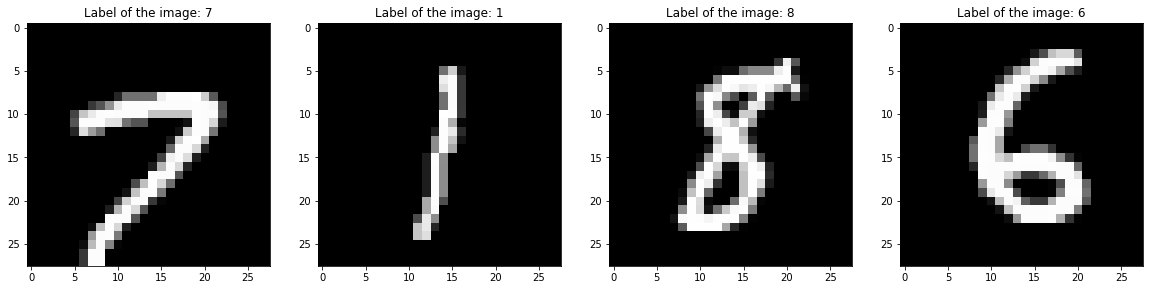

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,5))

plt.subplot(141)
plt.imshow(X_train[123].reshape(28,28), cmap="gray")
plt.title("Label of the image: {}".format(y_train[123]))

plt.subplot(142)
plt.imshow(X_train[124].reshape(28,28), cmap="gray")
plt.title("Label of the image: {}".format(y_train[124]))

plt.subplot(143)
plt.imshow(X_train[125].reshape(28,28), cmap="gray")
plt.title("Label of the image: {}".format(y_train[125]))

plt.subplot(144)
plt.imshow(X_train[126].reshape(28,28), cmap="gray")
plt.title("Label of the image: {}".format(y_train[126]))

plt.show()

1. In this task, you'll build an ANN and train and test it using the MNIST data. This ANN should consist of two hidden and one output layer. All hidden layers should be dense. The neuron sizes of the first layer and the second layer should be 32 and 16 respectively. Train this model 20 epochs and compare your train and test set performance with the example in the checkpoint. Is there any difference? If so, why?

In [13]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense

model = Sequential()
# our first dense layer
model.add(Dense(32, input_shape=(784,), activation="relu"))
# our second dense layer
model.add(Dense(16, activation="relu"))
# last layer is the output layer.
model.add(Dense(10, activation="softmax"))

In [14]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 32)                25120     
_________________________________________________________________
dense_4 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_5 (Dense)              (None, 10)                170       
Total params: 25,818
Trainable params: 25,818
Non-trainable params: 0
_________________________________________________________________


In [15]:
model.compile(optimizer='sgd', loss='categorical_crossentropy',
              metrics=['accuracy'])

In [16]:
# setting verbose=1 prints out some results after each epoch
model.fit(X_train, Y_train, batch_size=batch_size, epochs=20, verbose=1)

Train on 60000 samples
Epoch 1/20
60000/60000 [==============================] - 2s 32us/sample - loss: 1.6274 - accuracy: 0.5198
Epoch 2/20
60000/60000 [==============================] - 1s 23us/sample - loss: 0.7069 - accuracy: 0.8145
Epoch 3/20
60000/60000 [==============================] - 1s 24us/sample - loss: 0.5014 - accuracy: 0.8594
Epoch 4/20
60000/60000 [==============================] - 1s 23us/sample - loss: 0.4293 - accuracy: 0.8766
Epoch 5/20
60000/60000 [==============================] - 1s 23us/sample - loss: 0.3903 - accuracy: 0.8863
Epoch 6/20
60000/60000 [==============================] - 1s 23us/sample - loss: 0.3638 - accuracy: 0.8941
Epoch 7/20
60000/60000 [==============================] - 1s 23us/sample - loss: 0.3428 - accuracy: 0.9008
Epoch 8/20
60000/60000 [==============================] - 1s 23us/sample - loss: 0.3257 - accuracy: 0.9059
Epoch 9/20
60000/60000 [==============================] - 1s 22us/sample - loss: 0.3108 - accuracy: 0.9102
Epoch 10/20
60

In [17]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Test score: 0.2085102808237076
Test accuracy: 0.9366


The model achieved 94% accuracy in both the training and the test set. This level is lower than that of the example in the checkpoint. Since the layers include less number of neurons in this model, the model is simpler than the one of the example. This resulted in a lower performance. It seems, MNIST data requires a more complicated model than this one.

2. You'll also build an ANN in this task. This time, this ANN should have 5 hidden layers and 1 output layer. All the layers should be dense. The neuron numbers for the hidden layers should be 1024, 512, 256, 128 and 64. Train this model 20 epochs and test it using the same data from the previous task and compare your results. Is there any difference? If so, why?

In [18]:
model = Sequential()
# our first dense layer
model.add(Dense(1024, input_shape=(784,), activation="relu"))
# our second dense layer
model.add(Dense(512, activation="relu"))
# our third dense layer
model.add(Dense(256, activation="relu"))
# our fourth dense layer
model.add(Dense(128, activation="relu"))
# our fifth dense layer
model.add(Dense(64, activation="relu"))
# last layer is the output layer.
model.add(Dense(10, activation="softmax"))

In [19]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 1024)              803840    
_________________________________________________________________
dense_7 (Dense)              (None, 512)               524800    
_________________________________________________________________
dense_8 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_9 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_10 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_11 (Dense)             (None, 10)                650       
Total params: 1,501,770
Trainable params: 1,501,770
Non-trainable params: 0
____________________________________________

In [20]:
model.compile(optimizer='sgd', loss='categorical_crossentropy',
              metrics=['accuracy'])

In [21]:
# setting verbose=1 prints out some results after each epoch
model.fit(X_train, Y_train, batch_size=batch_size, epochs=20, verbose=1)

Train on 60000 samples
Epoch 1/20
60000/60000 [==============================] - 13s 224us/sample - loss: 1.1889 - accuracy: 0.7019
Epoch 2/20
60000/60000 [==============================] - 13s 210us/sample - loss: 0.3787 - accuracy: 0.8932
Epoch 3/20
60000/60000 [==============================] - 13s 219us/sample - loss: 0.2839 - accuracy: 0.9192
Epoch 4/20
60000/60000 [==============================] - 13s 212us/sample - loss: 0.2372 - accuracy: 0.9316
Epoch 5/20
60000/60000 [==============================] - 12s 206us/sample - loss: 0.2059 - accuracy: 0.9409
Epoch 6/20
60000/60000 [==============================] - 13s 209us/sample - loss: 0.1823 - accuracy: 0.9468
Epoch 7/20
60000/60000 [==============================] - 13s 208us/sample - loss: 0.1622 - accuracy: 0.9530
Epoch 8/20
60000/60000 [==============================] - 13s 209us/sample - loss: 0.1459 - accuracy: 0.9581
Epoch 9/20
60000/60000 [==============================] - 13s 214us/sample - loss: 0.1332 - accuracy: 0.9

In [22]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Test score: 0.10389775360999629
Test accuracy: 0.9688


In this case, the model achieved almost 99% accuracy in the training set and 97% accuracy in the test set. The model here is more complex than the model of the previous task and the model in the example. Because this model is more complex than the previous two models it achieved higher performance in the training set. However, the difference between the training score and test score widened a little bit. It may be a sign that this model is too complex and it started to overfit. Also, to add, it took MUCH longer to run.